# Project-2 
`Prajwal Patnaik`, `Bruno Ivasic`, `Diana Zhang`, `Kerry Zhang`, 

### Loading Libraries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import hvplot.pandas
import datetime as dt
import holoviews as hv
from prophet import Prophet
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report, balanced_accuracy_score

# Import BalancedRandomForestClassifier from imblearn
from imblearn.ensemble import BalancedRandomForestClassifier

# Import Support Vector Machine from sklearn
from sklearn import svm

# Import AdaBoostClassifier from sklearn
from sklearn.ensemble import AdaBoostClassifier

# Import the finta Python library and the TA module
from finta import TA

%matplotlib inline

### Choosing the Stock, Initial Investment and Share Size

In [2]:
# Choosing the stock ticker
stock_symbol = 'PEP'

# Set initial capital
initial_capital = float(100000)

# Set the share size
share_size = 500

### Importing Data

In [3]:
# Define Start Date and End Date of the historical data.
# Start Date is five years prior

end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=1825)

In [4]:
# Fetch historical price data for the specified stock using yfinance
stock_hd_df = yf.download(stock_symbol, start=start_date, end=end_date)

# Extract the closing prices for each stock
stock_hd_df = pd.DataFrame(stock_hd_df['Close'])

[*********************100%%**********************]  1 of 1 completed


In [5]:
# Ensuring the index is in date time format
stock_hd_df.index = pd.to_datetime(stock_hd_df.index, format='mixed', infer_datetime_format=True)

In [6]:
# Review the dataframe
display(stock_hd_df.head())
display(stock_hd_df.tail())

,Close
Date,
2018-12-20,110.209999
2018-12-21,109.419998
2018-12-24,106.029999
2018-12-26,108.330002
2018-12-27,109.419998


,Close
Date,
2023-12-11,167.820007
2023-12-12,168.470001
2023-12-13,172.009995
2023-12-14,168.250000
2023-12-15,167.000000


In [7]:
# Use hvPlot to visualize the closing price of the stock
stock_hd_df.hvplot.line(y=['Close'], title=f"{stock_symbol} - Historical Closing Price", xlabel="Date", ylabel = "Price in $")

:Curve   [Date]   (Close)

___Write the observations from the plot above here___

# Time Series Model with Prophet

In [8]:
# Using the stock_hd_df DataFrame, reset the index so the date information is no longer the index
stock_hd_prophet_df = stock_hd_df.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
stock_hd_prophet_df.columns = ['ds', 'y']

# Drop an NaN values from the stock_hd_prophet_df DataFrame
stock_hd_prophet_df = stock_hd_prophet_df.dropna()

# View the first and last five rows of the stock_hd_prophet_df DataFrame
display(stock_hd_prophet_df.head())
display(stock_hd_prophet_df.tail())

,ds,y
0,2018-12-20,110.209999
1,2018-12-21,109.419998
2,2018-12-24,106.029999
3,2018-12-26,108.330002
4,2018-12-27,109.419998


,ds,y
1251,2023-12-11,167.820007
1252,2023-12-12,168.470001
1253,2023-12-13,172.009995
1254,2023-12-14,168.250000
1255,2023-12-15,167.000000


In [9]:
# Call the Prophet function, store as an object
model_prophet = Prophet()
model_prophet

In [10]:
# Fit the time-series model.
model_prophet.fit(stock_hd_prophet_df)

19:58:12 - cmdstanpy - INFO - Chain [1] start processing
19:58:12 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 90 days
future_stock_value = model_prophet.make_future_dataframe(periods=90, freq='B')

# View the last five rows of the future_stock_value DataFrame
future_stock_value.tail()

,ds
1341,2024-04-15
1342,2024-04-16
1343,2024-04-17
1344,2024-04-18
1345,2024-04-19


In [12]:
# Make the predictions for the trend data using the future_stock_value DataFrame
forecast_stock_value = model_prophet.predict(future_stock_value)

# Display the first five rows of the forecast_stock_value DataFrame
forecast_stock_value.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1341,2024-04-15,167.953324,164.684188,180.991655,162.245875,173.946203,4.518169,4.518169,4.518169,0.312074,0.312074,0.312074,4.206095,4.206095,4.206095,0.0,0.0,0.0,172.471493
1342,2024-04-16,167.921588,164.546423,180.727964,162.081149,174.056203,4.708398,4.708398,4.708398,0.315689,0.315689,0.315689,4.392709,4.392709,4.392709,0.0,0.0,0.0,172.629986
1343,2024-04-17,167.889851,165.166807,180.978134,161.843582,174.208837,4.994702,4.994702,4.994702,0.432509,0.432509,0.432509,4.562193,4.562193,4.562193,0.0,0.0,0.0,172.884553
1344,2024-04-18,167.858115,164.477158,180.943635,161.741150,174.250181,4.896501,4.896501,4.896501,0.179941,0.179941,0.179941,4.716560,4.716560,4.716560,0.0,0.0,0.0,172.754616
1345,2024-04-19,167.826379,164.701445,181.845800,161.568664,174.449529,5.167177,5.167177,5.167177,0.309339,0.309339,0.309339,4.857839,4.857839,4.857839,0.0,0.0,0.0,172.993556


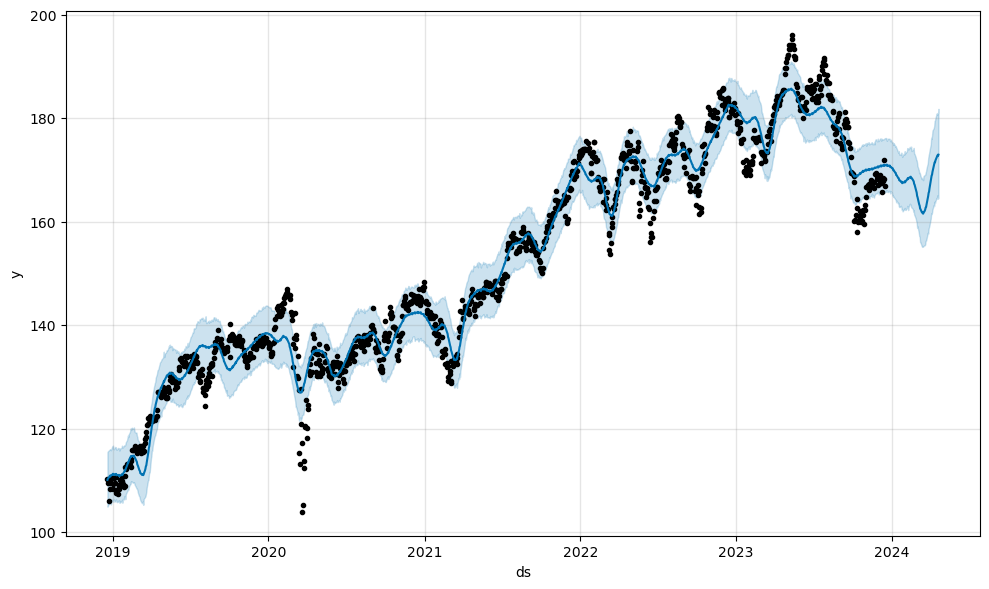

In [13]:
# Plot the Prophet predictions for the Stock data
model_prophet.plot(forecast_stock_value);

___What does the forecast model for the next month indicate?___

In [14]:
# Set the index in the forecast_stock_value DataFrame to the ds datetime column
forecast_stock_value.set_index("ds", inplace = True)

# View the only the yhat, yhat_lower and yhat_upper columns from the DataFrame
forecast_stock_value[['yhat', 'yhat_lower', 'yhat_upper']]

,yhat,yhat_lower,yhat_upper
ds,,,
2018-12-20,110.117985,104.939230,115.455564
2018-12-21,110.356205,105.056060,115.636104
2018-12-24,110.655437,105.631440,115.867861
2018-12-26,110.944101,105.850270,116.042522
2018-12-27,110.765510,105.479775,116.051600
...,...,...,...
2024-04-15,172.471493,164.684188,180.991655
2024-04-16,172.629986,164.546423,180.727964
2024-04-17,172.884553,165.166807,180.978134


_`yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals)._

In [15]:
# From the forecast_stock_value DataFrame, use hvPlot to visualize
# The yhat, yhat_lower, and yhat_upper columns over the last 90 days 
forecast_stock_value[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-90:,:].hvplot(
    title='Closing Price Prediction for the Forecast Period')

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

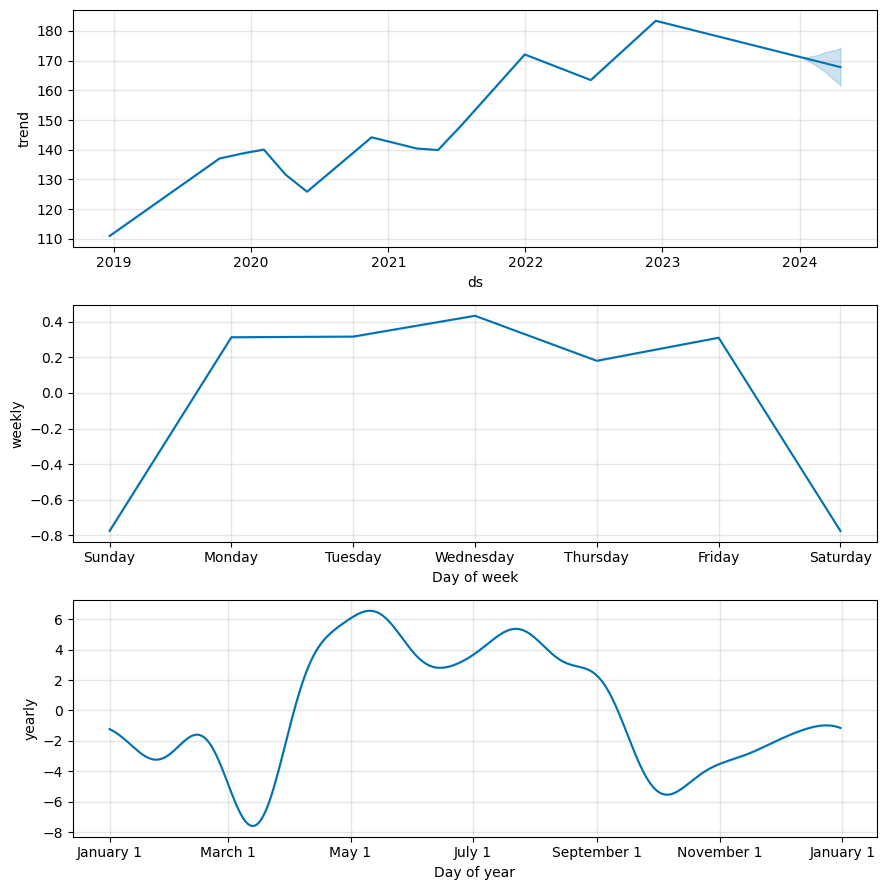

In [16]:
# Reset the index in the forecast_stock_value DataFrame
forecast_stock_value.reset_index(inplace = True)

# Use the plot_components function to visualize the forecast results 
model_prophet.plot_components(forecast_stock_value);

___What are the observations?___

In [17]:
# Produce a closing price forecast for the next 90 days
# Provide best case (yhat_upper), worst case (yhat_lower), and most likely (yhat) scenarios.
forecast_stock_value_month = forecast_stock_value[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-90:,:]

# Update the column names for the DataFrame
forecast_stock_value_month.columns = ["Most Likely", "Worst Case", "Best Case"]

# Review the last five rows of the DataFrame
forecast_stock_value_month.tail()

,Most Likely,Worst Case,Best Case
1341,172.471493,164.684188,180.991655
1342,172.629986,164.546423,180.727964
1343,172.884553,165.166807,180.978134
1344,172.754616,164.477158,180.943635
1345,172.993556,164.701445,181.845800


In [18]:
# Display the median closing price of the next month for the three scenarios
forecast_stock_value_month.median()

Most Likely    168.237152
Worst Case     162.726640
Best Case      173.928298
dtype: float64

# Algorithmic Trading

## DMAC (Dual-Moving Average Crossover) Trading Algorithm

### Writing an Algorithm that Uses DMAC Trading

#### EMA for the Short and Long Windows

An `exponential moving average (EMA)` is an exponentially weighted average of the previous 'n' closing periods. More recent closing prices are weighted heavier than older closing periods providing an average that is faster to respond to changing prices.

In [19]:
# Generating trading signals using short- and long-window EMA values.
# Set the short window and long window
short_window = 8
long_window = 68

In [20]:
# Generate the fast and slow exponentially moving averages
stock_hd_df['EMA_Fast'] = stock_hd_df['Close'].ewm(span=short_window).mean()
stock_hd_df['EMA_Slow'] = stock_hd_df['Close'].ewm(span=long_window).mean()

# Drop NaN Values
stock_hd_df = stock_hd_df.dropna()

# Review the DataFrame
display(stock_hd_df.head())
display(stock_hd_df.tail())

,Close,EMA_Fast,EMA_Slow
Date,,,
2018-12-20,110.209999,110.209999,110.209999
2018-12-21,109.419998,109.765624,109.809190
2018-12-24,106.029999,108.197822,108.512230
2018-12-26,108.330002,108.244149,108.464643
2018-12-27,109.419998,108.609413,108.667117


,Close,EMA_Fast,EMA_Slow
Date,,,
2023-12-11,167.820007,167.546537,169.266215
2023-12-12,168.470001,167.751751,169.243136
2023-12-13,172.009995,168.698027,169.323335
2023-12-14,168.250000,168.598466,169.292224
2023-12-15,167.000000,168.243251,169.225783


In [21]:
# Visualize close price for the investment
close = stock_hd_df[["Close"]].hvplot(
    line_color="forestgreen",
    ylabel="Price in $",
    width=1000,
    height=400)

# Using hvPlot to plot the moving averages
emoving_avgs = stock_hd_df[["EMA_Fast", "EMA_Slow"]].hvplot(
    ylabel="Price in $",
    width=1000,
    height=400,
    line_color=['royalblue', 'orangered']
)

# Overlay plots
ema_plot = close * emoving_avgs

# Show the plot
ema_plot.opts(
    title=f"{stock_symbol} - Closing Price with Exponentially Moving Averages",
    show_legend=True)

:Overlay
   .Curve.I     :Curve   [Date]   (Close)
   .NdOverlay.I :NdOverlay   [Variable]
      :Curve   [Date]   (value)

#### Trade Signals Identification

In [22]:
# Create a column to hold the trading signal
stock_hd_df["Signal"] = 0.0

# Generate the trading signal 0 or 1,
# where 1 is the short-window (EMA_Fast) greater than the long-window (EMA_Slow)
# and 0 is when the condition is not met
stock_hd_df["Signal"][short_window:] = np.where(
    stock_hd_df["EMA_Fast"][short_window:] > stock_hd_df["EMA_Slow"][short_window:], 1.0, 0.0
)

# Review the DataFrame
display(stock_hd_df.head())
display(stock_hd_df.tail())

,Close,EMA_Fast,EMA_Slow,Signal
Date,,,,
2018-12-20,110.209999,110.209999,110.209999,0.0
2018-12-21,109.419998,109.765624,109.809190,0.0
2018-12-24,106.029999,108.197822,108.512230,0.0
2018-12-26,108.330002,108.244149,108.464643,0.0
2018-12-27,109.419998,108.609413,108.667117,0.0


,Close,EMA_Fast,EMA_Slow,Signal
Date,,,,
2023-12-11,167.820007,167.546537,169.266215,0.0
2023-12-12,168.470001,167.751751,169.243136,0.0
2023-12-13,172.009995,168.698027,169.323335,0.0
2023-12-14,168.250000,168.598466,169.292224,0.0
2023-12-15,167.000000,168.243251,169.225783,0.0


#### Finding the Cross-Over Points

In [23]:
# Calculate the points in time when the Signal value changes
# Identify trade entry (1) and exit (-1) points
stock_hd_df["Entry/Exit"] = stock_hd_df["Signal"].diff()

# Review the DataFrame
display(stock_hd_df.head())
display(stock_hd_df.tail())

,Close,EMA_Fast,EMA_Slow,Signal,Entry/Exit
Date,,,,,
2018-12-20,110.209999,110.209999,110.209999,0.0,NaN
2018-12-21,109.419998,109.765624,109.809190,0.0,0.0
2018-12-24,106.029999,108.197822,108.512230,0.0,0.0
2018-12-26,108.330002,108.244149,108.464643,0.0,0.0
2018-12-27,109.419998,108.609413,108.667117,0.0,0.0


,Close,EMA_Fast,EMA_Slow,Signal,Entry/Exit
Date,,,,,
2023-12-11,167.820007,167.546537,169.266215,0.0,0.0
2023-12-12,168.470001,167.751751,169.243136,0.0,0.0
2023-12-13,172.009995,168.698027,169.323335,0.0,0.0
2023-12-14,168.250000,168.598466,169.292224,0.0,0.0
2023-12-15,167.000000,168.243251,169.225783,0.0,0.0


#### Plotting

In [24]:
# Visualize exit position relative to close price
exit = stock_hd_df[stock_hd_df["Entry/Exit"] == -1.0]["Close"].hvplot.scatter(
    color="darkred",
    marker="v",
    size=100,
    legend=True,
    ylabel="Price in $",
    width=1000,
    height=400,
    label='Sell')

# Visualize entry position relative to close price
entry = stock_hd_df[stock_hd_df["Entry/Exit"] == 1.0]["Close"].hvplot.scatter(
    color="navy",
    marker="^",
    size=100,
    legend=True,
    ylabel="Price in $",
    width=1000,
    height=400,
    label='Buy')

# Visualize close price for the investment
close = stock_hd_df[["Close"]].hvplot(
    line_color="forestgreen",
    ylabel="Price in $",
    width=1000,
    height=400)

# Visualize moving averages
emoving_avgs = stock_hd_df[["EMA_Fast", "EMA_Slow"]].hvplot(
    ylabel="Price in $",
    width=1000,
    height=400,
    line_color=['royalblue', 'orangered'])

# Create the overlay plot
entry_exit_plot = close * emoving_avgs * entry * exit

# Show the plot
entry_exit_plot.opts(
    title=(f"{stock_symbol} - EMA Fast, EMA Slow, Entry and Exit Points"),
    show_legend=True)

:Overlay
   .Curve.I      :Curve   [Date]   (Close)
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Buy  :Scatter   [Date]   (Close)
   .Scatter.Sell :Scatter   [Date]   (Close)

### Backtesting DMAC Trading

In [25]:
# Buy the chosen share position when the dual moving average crossover Signal equals 1
# Otherwise, `Position` should be zero (sell)
stock_hd_df['Position'] = share_size * stock_hd_df['Signal']

In [26]:
# Determine the points in time where a 500 share position is bought or sold
stock_hd_df['Entry/Exit Position'] = stock_hd_df['Position'].diff()

In [27]:
# Multiply the close price by the number of shares held, or the Position
stock_hd_df['Portfolio Holdings'] = stock_hd_df['Close'] * stock_hd_df['Position']

In [28]:
# Subtract the amount of either the cost or proceeds of the trade from the initial capital invested
stock_hd_df['Portfolio Cash'] = initial_capital - (stock_hd_df['Close'] * stock_hd_df['Entry/Exit Position']).cumsum() 

In [29]:
# Calculate the total portfolio value by adding the portfolio cash to the portfolio holdings (or investments)
stock_hd_df['Portfolio Total'] = stock_hd_df['Portfolio Cash'] + stock_hd_df['Portfolio Holdings']

In [30]:
# Calculate the portfolio daily returns
stock_hd_df['Portfolio Daily Returns'] = stock_hd_df['Portfolio Total'].pct_change()

In [31]:
# Calculate the portfolio cumulative returns
stock_hd_df['Portfolio Cumulative Returns'] = (1 + stock_hd_df['Portfolio Daily Returns']).cumprod() - 1

In [32]:
# Visualize exit position relative to total portfolio value
exit_position = stock_hd_df[stock_hd_df['Entry/Exit'] == -1.0]['Portfolio Total'].hvplot.scatter(
    color='darkred',
    marker='v',
    size=100,
    legend=True,
    ylabel='Total Stock Value',
    width=1000,
    height=400,
    label = "Sell"
)

# Visualize entry position relative to total portfolio value
entry_position = stock_hd_df[stock_hd_df['Entry/Exit'] == 1.0]['Portfolio Total'].hvplot.scatter(
    color='navy',
    marker='^',
    size=100,
    ylabel='Total Stock Value',
    width=1000,
    height=400,
    label = "Buy"
)

# Visualize the value of the total portfolio
total_portfolio_value = stock_hd_df[['Portfolio Total']].hvplot(
    line_color='forestgreen',
    ylabel='Total Stock Value',
    xlabel='Date',
    width=1000,
    height=400
)

# Overlay the plots
portfolio_entry_exit_plot = total_portfolio_value * entry_position * exit_position
portfolio_entry_exit_plot.opts(
    title=(f"{stock_symbol} - Total Stock Value | DMAC Algorithm"),
    yformatter='%.0f'
)

:Overlay
   .Curve.I      :Curve   [Date]   (Portfolio Total)
   .Scatter.Buy  :Scatter   [Date]   (Portfolio Total)
   .Scatter.Sell :Scatter   [Date]   (Portfolio Total)

### Assessing the Risk/Reward Characteristics of the DMAC Trading Algorithm

In [33]:
# Create a list for the column name
columns = ["Backtest"]

# Create a list holding the names of the new evaluation metrics
metrics = [
    "Annualized Returns",
    "Cumulative Returns",
    "Annual Volatility",
    "Sharpe Ratio",
    "Sortino Ratio"]

# Initialize the DataFrame with index set to the evaluation metrics and the column
portfolio_evaluation_df = pd.DataFrame(index=metrics, columns=columns)

# Review the DataFrame
portfolio_evaluation_df

,Backtest
Annualized Returns,NaN
Cumulative Returns,NaN
Annual Volatility,NaN
Sharpe Ratio,NaN
Sortino Ratio,NaN


#### Calculate the Metrics

In [34]:
# Calculate Annualized Returns
portfolio_evaluation_df.loc["Annualized Returns"] = (stock_hd_df["Portfolio Daily Returns"].mean() * 252)

# Calculate Cumulative Returns
portfolio_evaluation_df.loc["Cumulative Returns"] = stock_hd_df["Portfolio Cumulative Returns"][-1]

# Calculate Annual Volatility
portfolio_evaluation_df.loc["Annual Volatility"] = (stock_hd_df["Portfolio Daily Returns"].std() * np.sqrt(252))

# Calculate Sharpe ratio
portfolio_evaluation_df.loc["Sharpe Ratio"] = (stock_hd_df["Portfolio Daily Returns"].mean() * 252) / (stock_hd_df["Portfolio Daily Returns"].std() * np.sqrt(252))

# Review the Dataframe
portfolio_evaluation_df

,Backtest
Annualized Returns,0.008308
Cumulative Returns,0.01965
Annual Volatility,0.093675
Sharpe Ratio,0.088692
Sortino Ratio,NaN


##### Sortino Ratio

In [35]:
# Create a DataFrame that contains the Portfolio Daily Returns column
sortino_ratio_df = stock_hd_df[["Portfolio Daily Returns"]].copy()

# Create a column to hold downside return values
sortino_ratio_df.loc[:,"Downside Returns"] = 0

# Find Portfolio Daily Returns values less than 0,
# square those values, and add them to the Downside Returns column
sortino_ratio_df.loc[sortino_ratio_df["Portfolio Daily Returns"] < 0, "Downside Returns"] = sortino_ratio_df["Portfolio Daily Returns"]**2

sortino_ratio_df["Downside Returns"] = sortino_ratio_df["Portfolio Daily Returns"]**2

In [36]:
# Calculate the annualized downside standard deviation value
downside_standard_deviation = (np.sqrt(sortino_ratio_df["Downside Returns"].mean()) * np.sqrt(252))

In [37]:
# The Sortino ratio is reached by dividing the annualized return value by the downside standard deviation value

# Add the Sortino ratio to the evaluation DataFrame
portfolio_evaluation_df.loc["Sortino Ratio"] = portfolio_evaluation_df.loc["Annualized Returns"]/downside_standard_deviation

# Review the DataFrame
portfolio_evaluation_df

,Backtest
Annualized Returns,0.008308
Cumulative Returns,0.01965
Annual Volatility,0.093675
Sharpe Ratio,0.088692
Sortino Ratio,0.088726


#### Set Up the Trade-Level Risk/Reward Evaluation Metrics

In [38]:
# Loop through signal DataFrame
# If `Entry/Exit` is 1, set entry trade metrics
# Else if `Entry/Exit` is -1, set exit trade metrics and calculate profit
# Then append the record to the trade evaluation DataFrame
trades = []
columns=[
        "Stock",
        "Entry Date",
        "Exit Date",
        "Shares",
        "Entry Share Price",
        "Exit Share Price",
        "Entry Portfolio Holding",
        "Exit Portfolio Holding",
        "Profit/Loss"]

for index, row in stock_hd_df.iterrows():
    if row["Entry/Exit"] == 1:
        entry_date = index
        entry_portfolio_holding = row["Portfolio Holdings"]
        share_size = row["Entry/Exit Position"]
        entry_share_price = row["Close"]

    elif row["Entry/Exit"] == -1:
        exit_date = index
        exit_portfolio_holding = abs(row["Close"] * row["Entry/Exit Position"])
        exit_share_price = row["Close"]
        profit_loss = exit_portfolio_holding - entry_portfolio_holding
        
        trades.append(
            {
                "Stock": "PEP",
                "Entry Date": entry_date,
                "Exit Date": exit_date,
                "Shares": share_size,
                "Entry Share Price": entry_share_price,
                "Exit Share Price": exit_share_price,
                "Entry Portfolio Holding": entry_portfolio_holding,
                "Exit Portfolio Holding": exit_portfolio_holding,
                "Profit/Loss": profit_loss
            }
        )

# Construct and print the DataFrame
trade_evaluation_df = pd.DataFrame(trades, columns=columns)

In [39]:
trade_evaluation_df

,Stock,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss
0,PEP,2019-01-03,2019-01-09,500.0,108.260002,107.489998,54130.001068,53744.998932,-385.002136
1,PEP,2019-01-18,2019-08-01,500.0,110.070000,127.139999,55034.999847,63569.999695,8534.999847
2,PEP,2019-08-16,2019-11-08,500.0,131.759995,133.130005,65879.997253,66565.002441,685.005188
3,PEP,2019-11-27,2020-01-08,500.0,135.910004,134.699997,67955.001831,67349.998474,-605.003357
4,PEP,2020-01-14,2020-02-28,500.0,136.850006,132.029999,68425.003052,66014.999390,-2410.003662
5,PEP,2020-04-15,2020-05-06,500.0,135.029999,130.779999,67514.999390,65389.999390,-2125.000000
6,PEP,2020-05-08,2020-05-22,500.0,134.229996,130.479996,67114.997864,65239.997864,-1875.000000
7,PEP,2020-06-03,2020-06-04,500.0,132.820007,130.570007,66410.003662,65285.003662,-1125.000000
8,PEP,2020-06-09,2020-06-11,500.0,132.970001,127.839996,66485.000610,63919.998169,-2565.002441
9,PEP,2020-07-06,2020-09-17,500.0,133.300003,133.199997,66650.001526,66599.998474,-50.003052


In [40]:
trade_evaluation_df.describe()

,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss
count,21.0,21.000000,21.000000,21.000000,21.000000,21.000000
mean,500.0,147.769525,147.956666,73884.762355,73978.333064,93.570709
std,0.0,23.608574,22.930616,11804.286757,11465.308075,3077.116867
min,500.0,108.260002,107.489998,54130.001068,53744.998932,-3090.003967
25%,500.0,133.300003,130.779999,66650.001526,65389.999390,-1889.999390
50%,500.0,138.050003,134.699997,69025.001526,67349.998474,-1125.000000
75%,500.0,170.699997,167.410004,85349.998474,83705.001831,685.005188
max,500.0,187.529999,183.750000,93764.999390,91875.000000,8534.999847


### Machine Learning Implementation

In [41]:
# Use the pct_change function to generate daily returns from the closing prices
stock_hd_df["Daily Returns"] = stock_hd_df['Close'].pct_change()

# Calculate the strategy returns and add them to the stock_hd_df DataFrame
stock_hd_df['Strategy Returns'] = stock_hd_df['Daily Returns'] * stock_hd_df['Signal'].shift()

# Review the DataFrame
display(stock_hd_df.head())
display(stock_hd_df.tail())

,Close,EMA_Fast,EMA_Slow,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns,Daily Returns,Strategy Returns
Date,,,,,,,,,,,,,,
2018-12-20,110.209999,110.209999,110.209999,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-21,109.419998,109.765624,109.809190,0.0,0.0,0.0,0.0,0.0,100000.0,100000.0,NaN,NaN,-0.007168,-0.0
2018-12-24,106.029999,108.197822,108.512230,0.0,0.0,0.0,0.0,0.0,100000.0,100000.0,0.0,0.0,-0.030982,-0.0
2018-12-26,108.330002,108.244149,108.464643,0.0,0.0,0.0,0.0,0.0,100000.0,100000.0,0.0,0.0,0.021692,0.0
2018-12-27,109.419998,108.609413,108.667117,0.0,0.0,0.0,0.0,0.0,100000.0,100000.0,0.0,0.0,0.010062,0.0


,Close,EMA_Fast,EMA_Slow,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns,Daily Returns,Strategy Returns
Date,,,,,,,,,,,,,,
2023-12-11,167.820007,167.546537,169.266215,0.0,0.0,0.0,0.0,0.0,101964.984894,101964.984894,0.0,0.01965,0.012917,0.0
2023-12-12,168.470001,167.751751,169.243136,0.0,0.0,0.0,0.0,0.0,101964.984894,101964.984894,0.0,0.01965,0.003873,0.0
2023-12-13,172.009995,168.698027,169.323335,0.0,0.0,0.0,0.0,0.0,101964.984894,101964.984894,0.0,0.01965,0.021013,0.0
2023-12-14,168.250000,168.598466,169.292224,0.0,0.0,0.0,0.0,0.0,101964.984894,101964.984894,0.0,0.01965,-0.021859,-0.0
2023-12-15,167.000000,168.243251,169.225783,0.0,0.0,0.0,0.0,0.0,101964.984894,101964.984894,0.0,0.01965,-0.007429,-0.0


In [42]:
# Plot Strategy Returns to examine performance
(1 + stock_hd_df['Strategy Returns']).cumprod().hvplot(title = "Strategy Returns")

:Curve   [Date]   (Strategy Returns)

In [43]:
# Assign a copy of the ema_fast and ema_slow columns to a features DataFrame called X
X1 = stock_hd_df[['EMA_Slow', 'EMA_Fast']].shift().dropna()

# Review the DataFrame
X1.head()

,EMA_Slow,EMA_Fast
Date,,
2018-12-21,110.209999,110.209999
2018-12-24,109.809190,109.765624
2018-12-26,108.512230,108.197822
2018-12-27,108.464643,108.244149
2018-12-28,108.667117,108.609413


In [44]:
# Create the target set selecting the Signal column and assiging it to y
y1 = stock_hd_df['Signal']

# Review the value counts
y1.value_counts()

1.0    853
0.0    403
Name: Signal, dtype: int64

#### Using DateOffset to create rolling windows to test the model.

In [45]:
train_duration = 3  # months
step_size = 1  # month

# Initialize lists to store training and testing dataframes
all_X1_train = []
all_y1_train = []
all_X1_test = []
all_y1_test = []

# Initialize the starting point for the training period
current_start = X1.index.min()

# Loop until the end of the dataset
while current_start + pd.DateOffset(months=train_duration) <= X1.index.max():
    # Define the training end period
    training_end = current_start + pd.DateOffset(months=train_duration)

    # Generate the training data for the current window
    X1_train = X1.loc[current_start:training_end]
    y1_train = y1.loc[current_start:training_end]
    all_X1_train.append(X1_train)
    all_y1_train.append(y1_train)

    # Define the testing period as the next time step after the training end
    testing_end = training_end + pd.DateOffset(months=step_size)
    if testing_end > X1.index.max():
        testing_end = X1.index.max()

    # Generate the testing data for the current window
    X1_test = X1.loc[training_end:testing_end]
    y1_test = y1.loc[training_end:testing_end]
    all_X1_test.append(X1_test)
    all_y1_test.append(y1_test)

    # Update the start for the next iteration
    current_start = testing_end

# Concatenate all training and testing dataframes
final_X1_train = pd.concat(all_X1_train)
final_y1_train = pd.concat(all_y1_train)
final_X1_test = pd.concat(all_X1_test)
final_y1_test = pd.concat(all_y1_test)

In [46]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler1 = StandardScaler()

# Apply the scaler model to fit the X1_train data
X1_scaler = scaler1.fit(final_X1_train)

# Transform the X_train and X_test DataFrames using the X1_scaler
X1_train_scaled = X1_scaler.transform(final_X1_train)
X1_test_scaled = X1_scaler.transform(final_X1_test)

#### Balanced Random Forest

In [47]:
# Instantiate a BalancedRandomForestClassifier instance
brf = BalancedRandomForestClassifier(sampling_strategy='all', replacement=True)

# Fit the model to the training data
brf.fit(X1_train_scaled, final_y1_train)

BalancedRandomForestClassifier(replacement=True, sampling_strategy='all')

In [48]:
# Predict labels for testing features
y1_prediction = brf.predict(X1_test_scaled)

In [49]:
balanced_accuracy_score(final_y1_test, y1_prediction)

0.7649908800729595

In [50]:
# Print classification report
print(classification_report(final_y1_test, y1_prediction))

              precision    recall  f1-score   support

         0.0       0.57      0.66      0.61        68
         1.0       0.91      0.87      0.89       258

    accuracy                           0.83       326
   macro avg       0.74      0.76      0.75       326
weighted avg       0.84      0.83      0.83       326



#### Support Vector Machines

In [51]:
# Create the support vector classifier model
svm_model = svm.SVC()

# Fit the model to the training data
svm_model.fit(X1_train_scaled, final_y1_train)

SVC()

In [52]:
# Predict labels for testing features
y1_prediction_svm = svm_model.predict(X1_test_scaled)

In [53]:
balanced_accuracy_score(final_y1_test, y1_prediction_svm)

0.8192544459644322

In [54]:
# Print classification report
print(classification_report(final_y1_test, y1_prediction_svm))

              precision    recall  f1-score   support

         0.0       0.88      0.66      0.76        68
         1.0       0.92      0.98      0.95       258

    accuracy                           0.91       326
   macro avg       0.90      0.82      0.85       326
weighted avg       0.91      0.91      0.91       326



#### AdaBoost Classifier

In [55]:
# Create the ada boost classifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=0)
# Fit the model to the training data
adaboost.fit(X1_train_scaled, final_y1_train)

AdaBoostClassifier(random_state=0)

In [56]:
# Predict labels for testing features
y1_prediction_ada = adaboost.predict(X1_test_scaled)

In [57]:
balanced_accuracy_score(final_y1_test, y1_prediction_ada)

0.7464660282717739

In [58]:
# Print classification report
print(classification_report(final_y1_test, y1_prediction_ada))

              precision    recall  f1-score   support

         0.0       0.69      0.56      0.62        68
         1.0       0.89      0.93      0.91       258

    accuracy                           0.86       326
   macro avg       0.79      0.75      0.76       326
weighted avg       0.85      0.86      0.85       326



## Bollinger Bands Trading Algorithm

### Writing an Algorithm that Uses Bollinger Bands

In [59]:
# Fetch historical price data for the specified stock using yfinance
stock_df = yf.download(stock_symbol, start=start_date, end=end_date)

# Extract the closing prices for each stock
stock_df = pd.DataFrame(stock_df)

# Review the dataframe
display(stock_df.head())
display(stock_df.tail())

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-20,110.199997,111.930000,109.199997,110.209999,95.671486,8468300
2018-12-21,110.959999,114.160004,108.809998,109.419998,94.985687,13263600
2018-12-24,110.129997,111.089996,105.959999,106.029999,92.042892,3354000
2018-12-26,106.220001,108.440002,105.029999,108.330002,94.039497,4537000
2018-12-27,107.769997,109.470001,106.029999,109.419998,94.985687,5175900


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-11,167.440002,168.130005,166.460007,167.820007,167.820007,6912600
2023-12-12,169.279999,169.279999,167.710007,168.470001,168.470001,4515800
2023-12-13,168.539993,172.050003,168.119995,172.009995,172.009995,6082100
2023-12-14,171.649994,171.970001,167.940002,168.250000,168.250000,7119300
2023-12-15,167.449997,168.509995,166.449997,167.000000,167.000000,17731300


In [60]:
# Determine the Bollinger Bands for the Dataset
bbands_df = TA.BBANDS(stock_df)

In [61]:
# Concatenate the Bollinger Bands to the DataFrame
stock_df = pd.concat([stock_df, bbands_df], axis=1)

# Review the DataFrame
display(stock_df.head())
display(stock_df.tail())

,Open,High,Low,Close,Adj Close,Volume,BB_UPPER,BB_MIDDLE,BB_LOWER
Date,,,,,,,,,
2018-12-20,110.199997,111.930000,109.199997,110.209999,95.671486,8468300,NaN,NaN,NaN
2018-12-21,110.959999,114.160004,108.809998,109.419998,94.985687,13263600,NaN,NaN,NaN
2018-12-24,110.129997,111.089996,105.959999,106.029999,92.042892,3354000,NaN,NaN,NaN
2018-12-26,106.220001,108.440002,105.029999,108.330002,94.039497,4537000,NaN,NaN,NaN
2018-12-27,107.769997,109.470001,106.029999,109.419998,94.985687,5175900,NaN,NaN,NaN


,Open,High,Low,Close,Adj Close,Volume,BB_UPPER,BB_MIDDLE,BB_LOWER
Date,,,,,,,,,
2023-12-11,167.440002,168.130005,166.460007,167.820007,167.820007,6912600,169.752961,167.869001,165.985041
2023-12-12,169.279999,169.279999,167.710007,168.470001,168.470001,4515800,169.806138,167.904001,166.001864
2023-12-13,168.539993,172.050003,168.119995,172.009995,172.009995,6082100,170.744447,168.099001,165.453554
2023-12-14,171.649994,171.970001,167.940002,168.250000,168.250000,7119300,170.764515,168.149001,165.533486
2023-12-15,167.449997,168.509995,166.449997,167.000000,167.000000,17731300,170.773007,168.113500,165.453994


In [62]:
# Visualize close price for the investment
security_close = stock_df[["Close"]].hvplot(
    line_color='forestgreen',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_upper = stock_df[["BB_UPPER"]].hvplot(
    line_color='royalblue',
    ylabel='Price in $',
    width=1000,
    height=400
)


bb_middle = stock_df[["BB_MIDDLE"]].hvplot(
    line_color='purple',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_lower = stock_df[["BB_LOWER"]].hvplot(
    line_color='orangered',
    ylabel='Price in $',
    width=1000,
    height=400
)


# Overlay plots
bbands_plot = security_close * bb_upper * bb_middle * bb_lower

# Show the plot
bbands_plot.opts(
    title=(f"{stock_symbol} - Closing Price with Bollinger Bands"),
    show_legend=True)

:Overlay
   .Curve.I   :Curve   [Date]   (Close)
   .Curve.II  :Curve   [Date]   (BB_UPPER)
   .Curve.III :Curve   [Date]   (BB_MIDDLE)
   .Curve.IV  :Curve   [Date]   (BB_LOWER)

#### Trade Signals Identification

In [63]:
# Create a trading algorithm using Bollinger Bands
# Set the Signal column
stock_df["Signal"] = 0.0

# Create a value to hold the initial trade signal and the buy price
trade_signal = 0
buy_price = 0.0

# Set the stop loss percentage (e.g., 10%)
stop_loss_percentage = 0.3

# Update the DataFrame Signal column 1 (entry) or -1 (exit) for a long position trading algorithm
# where 1 is when the Close price is less than the BB_LOWER window
# where -1 is when the Close price is greater the the BB_UPPER window
# Incorporate a conditional in the if-statement, to evaluate the value of the trade_signal so the algorithm 
# plots only 1 entry and exit point per cycle.
for index, row in stock_df.iterrows():
    # Entry condition
    if (row["Close"] < row["BB_LOWER"]) and (trade_signal < 1):
        stock_df.loc[index, "Signal"] = 1.0
        trade_signal += 1
        buy_price = row["Close"]  # Record the buy price

    # Stop loss condition
    elif (buy_price > 0) and (row["Close"] < buy_price * (1 - stop_loss_percentage)) and (trade_signal > 0):
        stock_df.loc[index, "Signal"] = 0
        trade_signal = 0
        buy_price = 0.0  # Reset the buy price

    # Exit condition
    elif (row["Close"] > row["BB_UPPER"]) and (trade_signal > 0):
        stock_df.loc[index, "Signal"] = 0
        trade_signal = 0
        buy_price = 0.0  # Reset the buy price

    # Maintain position
    elif trade_signal == 1:
        stock_df.loc[index, "Signal"] = 1.0  # Maintain the position

# Review the DataFrame
display(stock_df.head())
display(stock_df.tail())

,Open,High,Low,Close,Adj Close,Volume,BB_UPPER,BB_MIDDLE,BB_LOWER,Signal
Date,,,,,,,,,,
2018-12-20,110.199997,111.930000,109.199997,110.209999,95.671486,8468300,NaN,NaN,NaN,0.0
2018-12-21,110.959999,114.160004,108.809998,109.419998,94.985687,13263600,NaN,NaN,NaN,0.0
2018-12-24,110.129997,111.089996,105.959999,106.029999,92.042892,3354000,NaN,NaN,NaN,0.0
2018-12-26,106.220001,108.440002,105.029999,108.330002,94.039497,4537000,NaN,NaN,NaN,0.0
2018-12-27,107.769997,109.470001,106.029999,109.419998,94.985687,5175900,NaN,NaN,NaN,0.0


,Open,High,Low,Close,Adj Close,Volume,BB_UPPER,BB_MIDDLE,BB_LOWER,Signal
Date,,,,,,,,,,
2023-12-11,167.440002,168.130005,166.460007,167.820007,167.820007,6912600,169.752961,167.869001,165.985041,1.0
2023-12-12,169.279999,169.279999,167.710007,168.470001,168.470001,4515800,169.806138,167.904001,166.001864,1.0
2023-12-13,168.539993,172.050003,168.119995,172.009995,172.009995,6082100,170.744447,168.099001,165.453554,0.0
2023-12-14,171.649994,171.970001,167.940002,168.250000,168.250000,7119300,170.764515,168.149001,165.533486,0.0
2023-12-15,167.449997,168.509995,166.449997,167.000000,167.000000,17731300,170.773007,168.113500,165.453994,0.0


#### Finding the Cross-Over Points

In [64]:
# Calculate the points in time when the Signal value changes
# Identify trade entry (1) and exit (-1) points
stock_df["Entry/Exit"] = stock_df["Signal"].diff()

# Review the DataFrame
display(stock_df.head())
display(stock_df.tail())

,Open,High,Low,Close,Adj Close,Volume,BB_UPPER,BB_MIDDLE,BB_LOWER,Signal,Entry/Exit
Date,,,,,,,,,,,
2018-12-20,110.199997,111.930000,109.199997,110.209999,95.671486,8468300,NaN,NaN,NaN,0.0,NaN
2018-12-21,110.959999,114.160004,108.809998,109.419998,94.985687,13263600,NaN,NaN,NaN,0.0,0.0
2018-12-24,110.129997,111.089996,105.959999,106.029999,92.042892,3354000,NaN,NaN,NaN,0.0,0.0
2018-12-26,106.220001,108.440002,105.029999,108.330002,94.039497,4537000,NaN,NaN,NaN,0.0,0.0
2018-12-27,107.769997,109.470001,106.029999,109.419998,94.985687,5175900,NaN,NaN,NaN,0.0,0.0


,Open,High,Low,Close,Adj Close,Volume,BB_UPPER,BB_MIDDLE,BB_LOWER,Signal,Entry/Exit
Date,,,,,,,,,,,
2023-12-11,167.440002,168.130005,166.460007,167.820007,167.820007,6912600,169.752961,167.869001,165.985041,1.0,0.0
2023-12-12,169.279999,169.279999,167.710007,168.470001,168.470001,4515800,169.806138,167.904001,166.001864,1.0,0.0
2023-12-13,168.539993,172.050003,168.119995,172.009995,172.009995,6082100,170.744447,168.099001,165.453554,0.0,-1.0
2023-12-14,171.649994,171.970001,167.940002,168.250000,168.250000,7119300,170.764515,168.149001,165.533486,0.0,0.0
2023-12-15,167.449997,168.509995,166.449997,167.000000,167.000000,17731300,170.773007,168.113500,165.453994,0.0,0.0


#### Plotting

In [65]:
# Visualize exit position relative to close price
exit = stock_df[stock_df["Entry/Exit"] == -1.0]["Close"].hvplot.scatter(
    color="darkred",
    marker="v",
    size=100,
    legend=True,
    ylabel="Price in $",
    width=1000,
    height=400,
    label='Sell')

# Visualize entry position relative to close price
entry = stock_df[stock_df["Entry/Exit"] == 1.0]["Close"].hvplot.scatter(
    color="navy",
    marker="^",
    size=100,
    legend=True,
    ylabel="Price in $",
    width=1000,
    height=400,
    label='Buy')

# Visualize close price for the investment
close = stock_df[["Close"]].hvplot(
    line_color="forestgreen",
    ylabel="Price in $",
    width=1000,
    height=400)

# Visualize moving averages
bb_bands = stock_df[["BB_UPPER", "BB_MIDDLE", "BB_LOWER"]].hvplot(
    ylabel="Price in $",
    width=1000,
    height=400,
    line_color=['royalblue', "gray",'orangered'])

# Create the overlay plot
entry_exit_plot = close * bb_bands * entry * exit

# Show the plot
entry_exit_plot.opts(
    title=(f"{stock_symbol} - Bollinger Bands, Entry and Exit Points"),
    show_legend=True)

:Overlay
   .Curve.I      :Curve   [Date]   (Close)
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Buy  :Scatter   [Date]   (Close)
   .Scatter.Sell :Scatter   [Date]   (Close)

### Backtesting Bollinger Bands Algorithm

In [66]:
# Buy a chosen share position when the Bolinger Band crossover Signal equals 1
# Otherwise, `Position` should be zero (sell)
stock_df['Position'] = share_size * stock_df['Signal']

In [67]:
# Determine the points in time where a 500 share position is bought or sold
stock_df['Entry/Exit Position'] = stock_df['Position'].diff()

In [68]:
# Multiply the close price by the number of shares held, or the Position
stock_df['Portfolio Holdings'] = stock_df['Close'] * stock_df['Position']

In [69]:
# Subtract the amount of either the cost or proceeds of the trade from the initial capital invested
stock_df['Portfolio Cash'] = initial_capital - (stock_df['Close'] * stock_df['Entry/Exit Position']).cumsum() 

In [70]:
# Calculate the total portfolio value by adding the portfolio cash to the portfolio holdings (or investments)
stock_df['Portfolio Total'] = stock_df['Portfolio Cash'] + stock_df['Portfolio Holdings']

In [71]:
# Calculate the portfolio daily returns
stock_df['Portfolio Daily Returns'] = stock_df['Portfolio Total'].pct_change()

In [72]:
# Calculate the portfolio cumulative returns
stock_df['Portfolio Cumulative Returns'] = (1 + stock_df['Portfolio Daily Returns']).cumprod() - 1

In [73]:
# Visualize exit position relative to total portfolio value
exit_position_bb = stock_df[stock_df['Entry/Exit'] == -1.0]['Portfolio Total'].hvplot.scatter(
    color='darkred',
    marker='v',
    size=100,
    legend=True,
    ylabel='Total Stock Value',
    width=1000,
    height=400,
    label = "Sell"
)

# Visualize entry position relative to total portfolio value
entry_position_bb = stock_df[stock_df['Entry/Exit'] == 1.0]['Portfolio Total'].hvplot.scatter(
    color='navy',
    marker='^',
    size=100,
    ylabel='Total Stock Value',
    width=1000,
    height=400,
    label = "Buy"
)

# Visualize the value of the total portfolio
total_portfolio_value_bb = stock_df[['Portfolio Total']].hvplot(
    line_color='forestgreen',
    ylabel='Total Stock Value',
    xlabel='Date',
    width=1000,
    height=400
)

# Overlay the plots
portfolio_entry_exit_plot_bb = total_portfolio_value_bb * entry_position_bb * exit_position_bb
portfolio_entry_exit_plot_bb.opts(
    title=(f"{stock_symbol} Algorithm - Total Stock Value | Bollinger Bands"),
    yformatter='%.0f'
)

:Overlay
   .Curve.I      :Curve   [Date]   (Portfolio Total)
   .Scatter.Buy  :Scatter   [Date]   (Portfolio Total)
   .Scatter.Sell :Scatter   [Date]   (Portfolio Total)

### Assessing the Risk/Reward Characteristics of the Bollinger Band Algorithm

In [74]:
# Create a list for the column name
columns = ["Backtest"]

# Create a list holding the names of the new evaluation metrics
metrics = [
    "Annualized Returns",
    "Cumulative Returns",
    "Annual Volatility",
    "Sharpe Ratio",
    "Sortino Ratio"]

# Initialize the DataFrame with index set to the evaluation metrics and the column
portfolio_evaluation_df_bb = pd.DataFrame(index=metrics, columns=columns)

# Review the DataFrame
portfolio_evaluation_df_bb

,Backtest
Annualized Returns,NaN
Cumulative Returns,NaN
Annual Volatility,NaN
Sharpe Ratio,NaN
Sortino Ratio,NaN


#### Calculate the Metrics

In [75]:
# Calculate Annualized Returns
portfolio_evaluation_df_bb.loc["Annualized Returns"] = (stock_df["Portfolio Daily Returns"].mean() * 252)

# Calculate Cumulative Returns
portfolio_evaluation_df_bb.loc["Cumulative Returns"] = stock_df["Portfolio Cumulative Returns"][-1]

# Calculate Annual Volatility
portfolio_evaluation_df_bb.loc["Annual Volatility"] = (stock_df["Portfolio Daily Returns"].std() * np.sqrt(252))

# Calculate Sharpe ratio
portfolio_evaluation_df_bb.loc["Sharpe Ratio"] = (stock_df["Portfolio Daily Returns"].mean() * 252) / (stock_df["Portfolio Daily Returns"].std() * np.sqrt(252))

# Review the Dataframe
portfolio_evaluation_df_bb

,Backtest
Annualized Returns,0.075387
Cumulative Returns,0.4105
Annual Volatility,0.111783
Sharpe Ratio,0.674404
Sortino Ratio,NaN


##### Sortino Ratio

In [76]:
# Create a DataFrame that contains the Portfolio Daily Returns column
sortino_ratio_df = stock_df[["Portfolio Daily Returns"]].copy()

# Create a column to hold downside return values
sortino_ratio_df.loc[:,"Downside Returns"] = 0

# Find Portfolio Daily Returns values less than 0,
# square those values, and add them to the Downside Returns column
sortino_ratio_df.loc[sortino_ratio_df["Portfolio Daily Returns"] < 0, "Downside Returns"] = sortino_ratio_df["Portfolio Daily Returns"]**2

sortino_ratio_df["Downside Returns"] = sortino_ratio_df["Portfolio Daily Returns"]**2

In [77]:
# Calculate the annualized downside standard deviation value
downside_standard_deviation = (np.sqrt(sortino_ratio_df["Downside Returns"].mean()) * np.sqrt(252))

In [78]:
# The Sortino ratio is reached by dividing the annualized return value by the downside standard deviation value

# Add the Sortino ratio to the evaluation DataFrame
portfolio_evaluation_df_bb.loc["Sortino Ratio"] = portfolio_evaluation_df_bb.loc["Annualized Returns"]/downside_standard_deviation

# Review the DataFrame
portfolio_evaluation_df_bb

,Backtest
Annualized Returns,0.075387
Cumulative Returns,0.4105
Annual Volatility,0.111783
Sharpe Ratio,0.674404
Sortino Ratio,0.674065


#### Set Up the Trade-Level Risk/Reward Evaluation Metrics

In [79]:
# Loop through signal DataFrame
# If `Entry/Exit` is 1, set entry trade metrics
# Else if `Entry/Exit` is -1, set exit trade metrics and calculate profit
# Then append the record to the trade evaluation DataFrame
trades = []
columns=[
        "Stock",
        "Entry Date",
        "Exit Date",
        "Shares",
        "Entry Share Price",
        "Exit Share Price",
        "Entry Portfolio Holding",
        "Exit Portfolio Holding",
        "Profit/Loss"]

for index, row in stock_df.iterrows():
    if row["Entry/Exit"] == 1:
        entry_date = index
        entry_portfolio_holding = row["Portfolio Holdings"]
        share_size = row["Entry/Exit Position"]
        entry_share_price = row["Close"]

    elif row["Entry/Exit"] == -1:
        exit_date = index
        exit_portfolio_holding = abs(row["Close"] * row["Entry/Exit Position"])
        exit_share_price = row["Close"]
        profit_loss = exit_portfolio_holding - entry_portfolio_holding
        
        trades.append(
            {
                "Stock": "PEP",
                "Entry Date": entry_date,
                "Exit Date": exit_date,
                "Shares": share_size,
                "Entry Share Price": entry_share_price,
                "Exit Share Price": exit_share_price,
                "Entry Portfolio Holding": entry_portfolio_holding,
                "Exit Portfolio Holding": exit_portfolio_holding,
                "Profit/Loss": profit_loss
            }
        )

# Construct and print the DataFrame
trade_evaluation_df_bb = pd.DataFrame(trades, columns=columns)

In [80]:
trade_evaluation_df_bb

,Stock,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss
0,PEP,2019-07-19,2019-09-04,500.0,130.089996,139.149994,65044.998169,69574.996948,4529.998779
1,PEP,2019-10-02,2019-10-04,500.0,133.940002,140.279999,66970.001221,70139.999390,3169.998169
2,PEP,2019-11-04,2019-12-04,500.0,135.160004,137.300003,67580.001831,68650.001526,1069.999695
3,PEP,2020-01-07,2020-01-15,500.0,134.009995,139.199997,67004.997253,69599.998474,2595.001221
4,PEP,2020-02-27,2020-07-27,500.0,136.369995,137.669998,68184.997559,68834.999084,650.001526
5,PEP,2020-09-18,2020-12-18,500.0,131.470001,146.929993,65735.000610,73464.996338,7729.995728
6,PEP,2021-02-11,2021-03-22,500.0,134.970001,137.800003,67485.000610,68900.001526,1415.000916
7,PEP,2021-06-18,2021-07-13,500.0,145.419998,152.960007,72709.999084,76480.003357,3770.004272
8,PEP,2021-09-28,2021-10-14,500.0,151.050003,159.259995,75525.001526,79629.997253,4104.995728
9,PEP,2021-11-30,2021-12-10,500.0,159.779999,168.970001,79889.999390,84485.000610,4595.001221


In [81]:
trade_evaluation_df_bb.describe()

,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss
count,17.0,17.000000,17.000000,17.000000,17.000000,17.000000
mean,500.0,153.223528,158.052940,76611.763898,79026.469960,2414.706062
std,0.0,19.422437,17.532638,9711.218561,8766.319245,3228.076270
min,500.0,130.089996,137.300003,65044.998169,68650.001526,-6790.000916
25%,500.0,134.970001,139.199997,67485.000610,69599.998474,1069.999695
50%,500.0,151.050003,159.259995,75525.001526,79629.997253,3165.000916
75%,500.0,167.759995,174.610001,83879.997253,87305.000305,4104.995728
max,500.0,186.639999,187.350006,93319.999695,93675.003052,7729.995728


### Machine Leaning Implementation

In [82]:
stock_df['Daily Returns'] = stock_df['Close'].pct_change().dropna()

# Calculate the strategy returns and add them to the stock_hd_df DataFrame
stock_df['Strategy Returns'] = stock_df['Daily Returns'] * stock_df['Signal'].shift()

# Review the DataFrame
display(stock_df.head())
display(stock_df.tail())

,Open,High,Low,Close,Adj Close,Volume,BB_UPPER,BB_MIDDLE,BB_LOWER,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns,Daily Returns,Strategy Returns
Date,,,,,,,,,,,,,,,,,,,,
2018-12-20,110.199997,111.930000,109.199997,110.209999,95.671486,8468300,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-21,110.959999,114.160004,108.809998,109.419998,94.985687,13263600,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,100000.0,100000.0,NaN,NaN,-0.007168,-0.0
2018-12-24,110.129997,111.089996,105.959999,106.029999,92.042892,3354000,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,100000.0,100000.0,0.0,0.0,-0.030982,-0.0
2018-12-26,106.220001,108.440002,105.029999,108.330002,94.039497,4537000,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,100000.0,100000.0,0.0,0.0,0.021692,0.0
2018-12-27,107.769997,109.470001,106.029999,109.419998,94.985687,5175900,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,100000.0,100000.0,0.0,0.0,0.010062,0.0


,Open,High,Low,Close,Adj Close,Volume,BB_UPPER,BB_MIDDLE,BB_LOWER,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns,Daily Returns,Strategy Returns
Date,,,,,,,,,,,,,,,,,,,,
2023-12-11,167.440002,168.130005,166.460007,167.820007,167.820007,6912600,169.752961,167.869001,165.985041,1.0,0.0,500.0,0.0,83910.003662,55045.005798,138955.009460,0.007760,0.38955,0.012917,0.012917
2023-12-12,169.279999,169.279999,167.710007,168.470001,168.470001,4515800,169.806138,167.904001,166.001864,1.0,0.0,500.0,0.0,84235.000610,55045.005798,139280.006409,0.002339,0.39280,0.003873,0.003873
2023-12-13,168.539993,172.050003,168.119995,172.009995,172.009995,6082100,170.744447,168.099001,165.453554,0.0,-1.0,0.0,-500.0,0.000000,141050.003052,141050.003052,0.012708,0.41050,0.021013,0.021013
2023-12-14,171.649994,171.970001,167.940002,168.250000,168.250000,7119300,170.764515,168.149001,165.533486,0.0,0.0,0.0,0.0,0.000000,141050.003052,141050.003052,0.000000,0.41050,-0.021859,-0.000000
2023-12-15,167.449997,168.509995,166.449997,167.000000,167.000000,17731300,170.773007,168.113500,165.453994,0.0,0.0,0.0,0.0,0.000000,141050.003052,141050.003052,0.000000,0.41050,-0.007429,-0.000000


In [83]:
# Plot Strategy Returns to examine performance
(1 + stock_df['Strategy Returns']).cumprod().hvplot(title = "Strategy Returns")

:Curve   [Date]   (Strategy Returns)

In [84]:
# Assign a copy of the ema_fast and ema_slow columns to a features DataFrame called X
X2 = stock_df[['BB_UPPER', 'BB_MIDDLE', 'BB_LOWER']].shift().dropna()

# Review the DataFrame
X2.head()

,BB_UPPER,BB_MIDDLE,BB_LOWER
Date,,,
2019-01-22,111.471736,109.006000,106.540264
2019-01-23,111.429396,108.991000,106.552605
2019-01-24,111.611030,109.056501,106.501971
2019-01-25,111.354129,109.230001,107.105872
2019-01-28,111.362701,109.281001,107.199300


In [85]:
# Create the target set selecting the Signal column and assiging it to y
y2 = stock_df['Signal']

# Review the value counts
y2.value_counts()

0.0    727
1.0    529
Name: Signal, dtype: int64

#### Using DateOffset to create rolling windows to test the model.

In [86]:
train_duration = 3  # months
step_size = 1  # month

# Initialize lists to store training and testing dataframes
all_X2_train = []
all_y2_train = []
all_X2_test = []
all_y2_test = []

# Initialize the starting point for the training period
current_start = X2.index.min()

# Loop until the end of the dataset
while current_start + pd.DateOffset(months=train_duration) <= X2.index.max():
    # Define the training end period
    training_end = current_start + pd.DateOffset(months=train_duration)

    # Generate the training data for the current window
    X2_train = X2.loc[current_start:training_end]
    y2_train = y2.loc[current_start:training_end]
    all_X2_train.append(X2_train)
    all_y2_train.append(y2_train)

    # Define the testing period as the next time step after the training end
    testing_end = training_end + pd.DateOffset(months=step_size)
    if testing_end > X2.index.max():
        testing_end = X2.index.max()

    # Generate the testing data for the current window
    X2_test = X2.loc[training_end:testing_end]
    y2_test = y2.loc[training_end:testing_end]
    all_X2_test.append(X2_test)
    all_y2_test.append(y2_test)

    # Update the start for the next iteration
    current_start = testing_end

# Concatenate all training and testing dataframes
final_X2_train = pd.concat(all_X2_train)
final_y2_train = pd.concat(all_y2_train)
final_X2_test = pd.concat(all_X2_test)
final_y2_test = pd.concat(all_y2_test)

In [87]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler2 = StandardScaler()

# Apply the scaler model to fit the X-train data
X2_scaler = scaler2.fit(final_X2_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X2_train_scaled = X2_scaler.transform(final_X2_train)
X2_test_scaled = X2_scaler.transform(final_X2_test)

#### Balanced Random Forest

In [88]:
# Instantiate a BalancedRandomForestClassifier instance
brf_bb = BalancedRandomForestClassifier(sampling_strategy='all', replacement=True)

# Fit the model to the training data
brf_bb.fit(X2_train_scaled, final_y2_train)

BalancedRandomForestClassifier(replacement=True, sampling_strategy='all')

In [89]:
# Predict labels for testing features
y2_prediction = brf_bb.predict(X2_test_scaled)

In [90]:
balanced_accuracy_score(final_y2_test, y2_prediction)

0.6401168699186992

In [91]:
# Print classification report
print(classification_report(final_y2_test, y2_prediction))

              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74       205
         1.0       0.48      0.57      0.52        96

    accuracy                           0.66       301
   macro avg       0.63      0.64      0.63       301
weighted avg       0.68      0.66      0.67       301



#### Support Vector Machines

In [92]:
# Create the support vector classifier model
svm_model_bb = svm.SVC()

# Fit the model to the training data
svm_model_bb.fit(X2_train_scaled, final_y2_train)

SVC()

In [93]:
# Predict labels for testing features
y2_prediction_svm = svm_model_bb.predict(X2_test_scaled)

In [94]:
balanced_accuracy_score(final_y2_test, y2_prediction_svm)

0.5239583333333333

In [95]:
# Print classification report
print(classification_report(final_y2_test, y2_prediction_svm))

              precision    recall  f1-score   support

         0.0       0.70      0.60      0.65       205
         1.0       0.34      0.45      0.39        96

    accuracy                           0.55       301
   macro avg       0.52      0.52      0.52       301
weighted avg       0.59      0.55      0.56       301



#### AdaBoost Classifier

In [96]:
# Create the ada boost classifier
adaboost_bb = AdaBoostClassifier(n_estimators=50, random_state=0)
# Fit the model to the training data
adaboost_bb.fit(X2_train_scaled, final_y2_train)

AdaBoostClassifier(random_state=0)

In [97]:
# Predict labels for testing features
y2_prediction_ada = adaboost_bb.predict(X2_test_scaled)

In [98]:
balanced_accuracy_score(final_y2_test, y2_prediction_ada)

0.6498729674796748

In [99]:
# Print classification report
print(classification_report(final_y2_test, y2_prediction_ada))

              precision    recall  f1-score   support

         0.0       0.78      0.73      0.75       205
         1.0       0.50      0.57      0.53        96

    accuracy                           0.68       301
   macro avg       0.64      0.65      0.64       301
weighted avg       0.69      0.68      0.68       301



## RSI Oscillator (Relative Strength Index) Trading Algorithm

The relative strength index (RSI) is a momentum indicator used in technical analysis. RSI measures the speed and magnitude of a security's recent price changes to evaluate overvalued or undervalued conditions in the price of that security.

The RSI can do more than point to overbought and oversold securities. It can also indicate securities that may be primed for a trend reversal or corrective pullback in price. It can signal when to buy and sell. Traditionally, an RSI reading of `70` or above indicates an overbought situation. A reading of `30` or below indicates an oversold condition.

### Writing an Algorithm that Uses Relative Strength Index

In [100]:
# Define the number of periods (in days) for the RSI windows calculations
rsi_window_size = 14 

# Set the RSI upper and lower boundaries. RSI is considered overbought when above 70 (ie sell signal) and oversold when below 30 (ie buy signal).
# The following values are set after optimization
rsi_lower_bound = 40
rsi_upper_bound = 60

In [101]:
# Fetch historical price data for the specified stock using yfinance
stock_rsi_df = yf.download(stock_symbol, start=start_date, end=end_date)

# Review the dataframe
display(stock_rsi_df.head())
display(stock_rsi_df.tail())

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-20,110.199997,111.930000,109.199997,110.209999,95.671486,8468300
2018-12-21,110.959999,114.160004,108.809998,109.419998,94.985687,13263600
2018-12-24,110.129997,111.089996,105.959999,106.029999,92.042885,3354000
2018-12-26,106.220001,108.440002,105.029999,108.330002,94.039482,4537000
2018-12-27,107.769997,109.470001,106.029999,109.419998,94.985687,5175900


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-11,167.440002,168.130005,166.460007,167.820007,167.820007,6912600
2023-12-12,169.279999,169.279999,167.710007,168.470001,168.470001,4515800
2023-12-13,168.539993,172.050003,168.119995,172.009995,172.009995,6082100
2023-12-14,171.649994,171.970001,167.940002,168.250000,168.250000,7119300
2023-12-15,167.449997,168.509995,166.449997,167.000000,167.000000,17731300


In [102]:
# Determine the Relative Strength Indicator (RSI) for the Dataset

# Generate a series with the Relative Strength Indicator
rsi_series = TA.RSI(stock_rsi_df, rsi_window_size)

In [103]:
# Since TA uses the window size as part of the output column name for the RSI result, (eg "14 period RSI")
# create a variable to make it easier to reference when generating our signals later on.

# Assign the variable with the RSI column name
rsi_column_name = f"RSI_{rsi_window_size}"

# Rename the series
rsi_series.name = rsi_column_name

# Concatenate the RSI series to our stock dataset
stock_rsi_df = pd.concat([stock_rsi_df, rsi_series], axis=1).dropna()

In [104]:
# Review the dataframe
display(stock_rsi_df.head())
display(stock_rsi_df.tail())

,Open,High,Low,Close,Adj Close,Volume,RSI_14
Date,,,,,,,
2018-12-21,110.959999,114.160004,108.809998,109.419998,94.985687,13263600,0.000000
2018-12-24,110.129997,111.089996,105.959999,106.029999,92.042885,3354000,0.000000
2018-12-26,106.220001,108.440002,105.029999,108.330002,94.039482,4537000,37.526356
2018-12-27,107.769997,109.470001,106.029999,109.419998,94.985687,5175900,47.568180
2018-12-28,110.089996,111.099998,109.220001,110.360001,95.801704,5410300,54.378588


,Open,High,Low,Close,Adj Close,Volume,RSI_14
Date,,,,,,,
2023-12-11,167.440002,168.130005,166.460007,167.820007,167.820007,6912600,51.999112
2023-12-12,169.279999,169.279999,167.710007,168.470001,168.470001,4515800,54.289197
2023-12-13,168.539993,172.050003,168.119995,172.009995,172.009995,6082100,64.283439
2023-12-14,171.649994,171.970001,167.940002,168.250000,168.250000,7119300,51.422951
2023-12-15,167.449997,168.509995,166.449997,167.000000,167.000000,17731300,47.985948


In [105]:
# Visualize close price for the investment
security_close = stock_rsi_df[["Close"]].hvplot(
    line_color='forestgreen',
    ylabel='Price in $',
    width=1000,
    height=400
).opts(
    title=(f"{stock_symbol} - Closing Price with Relative Strength Index (RSI)"),
    show_legend=True)


# Create the RSI plot using hvplot
rsi_plot = stock_rsi_df[rsi_column_name].hvplot(
    ylabel='Relative Strength Indicator',
    width=1000,
    height=400,
    legend=True
).opts(
    title=(f"{stock_symbol} - RSI Oscillator"),
    show_legend=True)


# Create additional overlays for overbought and oversold levels
oversold = hv.HLine(rsi_lower_bound).opts(line_dash='dashed', line_color='green', line_width=1.5)
overbought = hv.HLine(rsi_upper_bound).opts(line_dash='dashed', line_color='red', line_width=1.5)

# Overlay the RSI plot and the horizontal lines
combined_plot = (security_close + (rsi_plot * oversold * overbought)).cols(1)

# Display the combined plot
combined_plot

:Layout
   .Curve.I        :Curve   [Date]   (Close)
   .Overlay.RSI_14 :Overlay
      .Curve.RSI_14 :Curve   [Date]   (RSI_14)
      .HLine.I      :HLine   [x,y]
      .HLine.II     :HLine   [x,y]

#### Trade Signals Identification

In [106]:
# Create trading signals using the RSI algorithm

# Initialise the Signal column to a neutral no action position
stock_rsi_df["Signal"] = 0.0

# Initialise the working trade signal and buy price variables
trade_signal = 0
buy_price = 0.0

# Set the stop loss percentage (e.g., 10%  = 0.10)
rsi_stop_loss_percentage = 0.05

# Update the DataFrame Signal column 1 (entry) or -1 (exit) for a long position trading algorithm
# where 1 is when the Close price is less than or equal to our RSI_LOWER_BOUND threshold
# where -1 is when the Close price is greater or equal to our RSI_UPPER_BOUND threshold
# Incorporate a conditional in the if-statement, to evaluate the value of the trade_signal so the algorithm 
# plots only 1 entry and exit point per cycle.
for index, row in stock_rsi_df[rsi_window_size:].iterrows():
    # Entry condition
    if (row[rsi_column_name] <= rsi_lower_bound) and (trade_signal < 1):
        stock_rsi_df.loc[index, "Signal"] = 1.0
        trade_signal = 1
        buy_price = row["Close"]  # Record the buy price

    # Exit condition
    elif (row[rsi_column_name] >= rsi_upper_bound) and (trade_signal > 0):  
        stock_rsi_df.loc[index, "Signal"] = 0
        trade_signal = 0
        buy_price = 0.0  # Reset the buy price

        # Stop loss condition
    elif (buy_price > 0) and (row["Close"] < buy_price * (1 - rsi_stop_loss_percentage)) and (trade_signal > 0):
        stock_rsi_df.loc[index, "Signal"] = 0
        trade_signal = 0
        buy_price = 0.0  # Reset the buy price


    # Maintain position
    else:
        stock_rsi_df.loc[index, "Signal"] = trade_signal  # Maintain the position

# Review the DataFrame
display(stock_rsi_df.head())
display(stock_rsi_df.tail())

,Open,High,Low,Close,Adj Close,Volume,RSI_14,Signal
Date,,,,,,,,
2018-12-21,110.959999,114.160004,108.809998,109.419998,94.985687,13263600,0.000000,0.0
2018-12-24,110.129997,111.089996,105.959999,106.029999,92.042885,3354000,0.000000,0.0
2018-12-26,106.220001,108.440002,105.029999,108.330002,94.039482,4537000,37.526356,0.0
2018-12-27,107.769997,109.470001,106.029999,109.419998,94.985687,5175900,47.568180,0.0
2018-12-28,110.089996,111.099998,109.220001,110.360001,95.801704,5410300,54.378588,0.0


,Open,High,Low,Close,Adj Close,Volume,RSI_14,Signal
Date,,,,,,,,
2023-12-11,167.440002,168.130005,166.460007,167.820007,167.820007,6912600,51.999112,0.0
2023-12-12,169.279999,169.279999,167.710007,168.470001,168.470001,4515800,54.289197,0.0
2023-12-13,168.539993,172.050003,168.119995,172.009995,172.009995,6082100,64.283439,0.0
2023-12-14,171.649994,171.970001,167.940002,168.250000,168.250000,7119300,51.422951,0.0
2023-12-15,167.449997,168.509995,166.449997,167.000000,167.000000,17731300,47.985948,0.0


#### Finding the Cross-Over Points

In [107]:
# Calculate the points in time when the Signal value changes
# Identify trade entry (1) and exit (-1) points
stock_rsi_df["Entry/Exit"] = stock_rsi_df["Signal"].diff()

# Review the DataFrame
display(stock_rsi_df.head())
display(stock_rsi_df.tail())

,Open,High,Low,Close,Adj Close,Volume,RSI_14,Signal,Entry/Exit
Date,,,,,,,,,
2018-12-21,110.959999,114.160004,108.809998,109.419998,94.985687,13263600,0.000000,0.0,NaN
2018-12-24,110.129997,111.089996,105.959999,106.029999,92.042885,3354000,0.000000,0.0,0.0
2018-12-26,106.220001,108.440002,105.029999,108.330002,94.039482,4537000,37.526356,0.0,0.0
2018-12-27,107.769997,109.470001,106.029999,109.419998,94.985687,5175900,47.568180,0.0,0.0
2018-12-28,110.089996,111.099998,109.220001,110.360001,95.801704,5410300,54.378588,0.0,0.0


,Open,High,Low,Close,Adj Close,Volume,RSI_14,Signal,Entry/Exit
Date,,,,,,,,,
2023-12-11,167.440002,168.130005,166.460007,167.820007,167.820007,6912600,51.999112,0.0,0.0
2023-12-12,169.279999,169.279999,167.710007,168.470001,168.470001,4515800,54.289197,0.0,0.0
2023-12-13,168.539993,172.050003,168.119995,172.009995,172.009995,6082100,64.283439,0.0,0.0
2023-12-14,171.649994,171.970001,167.940002,168.250000,168.250000,7119300,51.422951,0.0,0.0
2023-12-15,167.449997,168.509995,166.449997,167.000000,167.000000,17731300,47.985948,0.0,0.0


#### Plotting

In [108]:
# Visualize exit position relative to close price
exit = stock_rsi_df[stock_rsi_df["Entry/Exit"] == -1.0]["Close"].hvplot.scatter(
    color="darkred",
    marker="v",
    size=100,
    legend=True,
    ylabel="Price in $",
    width=1000,
    height=400,
    label='Sell')

# Visualize entry position relative to close price
entry = stock_rsi_df[stock_rsi_df["Entry/Exit"] == 1.0]["Close"].hvplot.scatter(
    color="navy",
    marker="^",
    size=100,
    legend=True,
    ylabel="Price in $",
    width=1000,
    height=400,
    label='Buy')

# Visualize close price for the investment
rsi_close = stock_rsi_df[["Close"]].hvplot(
    line_color='forestgreen',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Create the overlay plot
entry_exit_plot = rsi_close * entry * exit

# Show the plot
entry_exit_plot.opts(
    title=(f"{stock_symbol} - RSI Oscillator, Entry and Exit Points"),
    show_legend=True)

:Overlay
   .Curve.I      :Curve   [Date]   (Close)
   .Scatter.Buy  :Scatter   [Date]   (Close)
   .Scatter.Sell :Scatter   [Date]   (Close)

### Backtesting RSI Algorithm

In [109]:
# Buy the chosen share position when the RSI crossover Signal equals 1
# Otherwise, `Position` should be zero (sell)
stock_rsi_df['Position'] = share_size * stock_rsi_df['Signal']

In [110]:
# Determine the points in time where a 500 share position is bought or sold
stock_rsi_df['Entry/Exit Position'] = stock_rsi_df['Position'].diff()

In [111]:
# Multiply the close price by the number of shares held, or the Position
stock_rsi_df['Portfolio Holdings'] = stock_rsi_df['Close'] * stock_rsi_df['Position']

In [112]:
# Subtract the amount of either the cost or proceeds of the trade from the initial capital invested
stock_rsi_df['Portfolio Cash'] = initial_capital - (stock_rsi_df['Close'] * stock_rsi_df['Entry/Exit Position']).cumsum() 

In [113]:
# Calculate the total portfolio value by adding the portfolio cash to the portfolio holdings (or investments)
stock_rsi_df['Portfolio Total'] = stock_rsi_df['Portfolio Cash'] + stock_rsi_df['Portfolio Holdings']

In [114]:
# Calculate the portfolio daily returns
stock_rsi_df['Portfolio Daily Returns'] = stock_rsi_df['Portfolio Total'].pct_change()

In [115]:
# Calculate the portfolio cumulative returns
stock_rsi_df['Portfolio Cumulative Returns'] = (1 + stock_rsi_df['Portfolio Daily Returns']).cumprod() - 1

In [116]:
# Visualize exit position relative to total portfolio value
exit_position_rsi = stock_rsi_df[stock_rsi_df['Entry/Exit'] == -1.0]['Portfolio Total'].hvplot.scatter(
    color='darkred',
    marker='v',
    size=100,
    legend=True,
    ylabel='Total Stock Value',
    width=1000,
    height=400,
    label = "Sell"
)

# Visualize entry position relative to total portfolio value
entry_position_rsi = stock_rsi_df[stock_rsi_df['Entry/Exit'] == 1.0]['Portfolio Total'].hvplot.scatter(
    color='navy',
    marker='^',
    size=100,
    ylabel='Total Stock Value',
    width=1000,
    height=400,
    label = "Buy"
)

# Visualize the value of the total portfolio
total_portfolio_value_rsi = stock_rsi_df[['Portfolio Total']].hvplot(
    line_color='forestgreen',
    ylabel='Total Stock Value',
    xlabel='Date',
    width=1000,
    height=400
)

# Overlay the plots
portfolio_entry_exit_plot_rsi = total_portfolio_value_rsi * entry_position_rsi * exit_position_rsi
portfolio_entry_exit_plot_rsi.opts(
    title=(f"{stock_symbol} - Total Stock Value | Relative Strength Index Algorithm"),
    yformatter='%.0f'
)

:Overlay
   .Curve.I      :Curve   [Date]   (Portfolio Total)
   .Scatter.Buy  :Scatter   [Date]   (Portfolio Total)
   .Scatter.Sell :Scatter   [Date]   (Portfolio Total)

### Assessing the Risk/Reward Characteristics of the RSI Algorithm

In [117]:
# Create a list for the column name
columns = ["Backtest"]

# Create a list holding the names of the new evaluation metrics
metrics = [
    "Annualized Returns",
    "Cumulative Returns",
    "Annual Volatility",
    "Sharpe Ratio",
    "Sortino Ratio"]

# Initialize the DataFrame with index set to the evaluation metrics and the column
portfolio_evaluation_df_rsi = pd.DataFrame(index=metrics, columns=columns)

# Review the DataFrame
portfolio_evaluation_df_rsi

,Backtest
Annualized Returns,NaN
Cumulative Returns,NaN
Annual Volatility,NaN
Sharpe Ratio,NaN
Sortino Ratio,NaN


#### Calculate the Metrics

In [118]:
# Calculate Annualized Returns
portfolio_evaluation_df_rsi.loc["Annualized Returns"] = (stock_rsi_df["Portfolio Daily Returns"].mean() * 252)

# Calculate Cumulative Returns
portfolio_evaluation_df_rsi.loc["Cumulative Returns"] = stock_rsi_df["Portfolio Cumulative Returns"][-1]

# Calculate Annual Volatility
portfolio_evaluation_df_rsi.loc["Annual Volatility"] = (stock_rsi_df["Portfolio Daily Returns"].std() * np.sqrt(252))


# Calculate Sharpe ratio
portfolio_evaluation_df_rsi.loc["Sharpe Ratio"] = (stock_rsi_df["Portfolio Daily Returns"].mean() * 252) / (stock_rsi_df["Portfolio Daily Returns"].std() * np.sqrt(252))

# Review the Dataframe
portfolio_evaluation_df_rsi

,Backtest
Annualized Returns,0.045923
Cumulative Returns,0.2212
Annual Volatility,0.107016
Sharpe Ratio,0.429124
Sortino Ratio,NaN


##### Sortino Ratio

In [119]:
# Create a DataFrame that contains the Portfolio Daily Returns column
sortino_ratio_df = stock_rsi_df[["Portfolio Daily Returns"]].copy()

# Create a column to hold downside return values
sortino_ratio_df.loc[:,"Downside Returns"] = 0

# Find Portfolio Daily Returns values less than 0,
# square those values, and add them to the Downside Returns column
sortino_ratio_df.loc[sortino_ratio_df["Portfolio Daily Returns"] < 0, "Downside Returns"] = sortino_ratio_df["Portfolio Daily Returns"]**2

sortino_ratio_df["Downside Returns"] = sortino_ratio_df["Portfolio Daily Returns"]**2

In [120]:
# Calculate the annualized downside standard deviation value
downside_standard_deviation = (np.sqrt(sortino_ratio_df["Downside Returns"].mean()) * np.sqrt(252))

In [121]:
# The Sortino ratio is reached by dividing the annualized return value by the downside standard deviation value

# Add the Sortino ratio to the evaluation DataFrame
portfolio_evaluation_df_rsi.loc["Sortino Ratio"] = portfolio_evaluation_df_rsi.loc["Annualized Returns"]/downside_standard_deviation

# Review the DataFrame
portfolio_evaluation_df_rsi

,Backtest
Annualized Returns,0.045923
Cumulative Returns,0.2212
Annual Volatility,0.107016
Sharpe Ratio,0.429124
Sortino Ratio,0.429138


#### Set Up the Trade-Level Risk/Reward Evaluation Metrics

In [122]:
# Loop through signal DataFrame
# If `Entry/Exit` is 1, set entry trade metrics
# Else if `Entry/Exit` is -1, set exit trade metrics and calculate profit
# Then append the record to the trade evaluation DataFrame
trades = []
columns=[
        "Stock",
        "Entry Date",
        "Exit Date",
        "Shares",
        "Entry Share Price",
        "Exit Share Price",
        "Entry Portfolio Holding",
        "Exit Portfolio Holding",
        "Profit/Loss"]

for index, row in stock_rsi_df.iterrows():
    if row["Entry/Exit"] == 1: 
        entry_date = index
        entry_portfolio_holding = row["Portfolio Holdings"]
        share_size = row["Entry/Exit Position"]
        entry_share_price = row["Close"]

    elif row["Entry/Exit"] == -1:
        exit_date = index
        exit_portfolio_holding = abs(row["Close"] * row["Entry/Exit Position"])
        exit_share_price = row["Close"]
        profit_loss = exit_portfolio_holding - entry_portfolio_holding
        
        trades.append(
            {
                "Stock": "PEP",
                "Entry Date": entry_date,
                "Exit Date": exit_date,
                "Shares": share_size,
                "Entry Share Price": entry_share_price,
                "Exit Share Price": exit_share_price,
                "Entry Portfolio Holding": entry_portfolio_holding,
                "Exit Portfolio Holding": exit_portfolio_holding,
                "Profit/Loss": profit_loss
            }
        )

# Construct and print the DataFrame
trade_evaluation_df_rsi = pd.DataFrame(trades, columns=columns)

In [123]:
trade_evaluation_df_rsi 

,Stock,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss
0,PEP,2019-07-24,2019-08-27,500.0,129.210007,134.759995,64605.003357,67379.997253,2774.993896
1,PEP,2019-11-05,2019-12-04,500.0,134.009995,137.300003,67004.997253,68650.001526,1645.004272
2,PEP,2020-01-07,2020-01-15,500.0,134.009995,139.199997,67004.997253,69599.998474,2595.001221
3,PEP,2020-02-27,2020-03-12,500.0,136.369995,115.339996,68184.997559,57669.998169,-10514.999390
4,PEP,2020-03-16,2020-03-20,500.0,113.089996,103.930000,56544.998169,51965.000153,-4579.998016
5,PEP,2020-03-23,2020-07-14,500.0,105.180000,135.520004,52590.000153,67760.002136,15170.001984
6,PEP,2020-09-17,2020-10-01,500.0,133.199997,140.800003,66599.998474,70400.001526,3800.003052
7,PEP,2020-10-28,2020-11-10,500.0,134.169998,141.720001,67084.999084,70860.000610,3775.001526
8,PEP,2021-01-21,2021-02-19,500.0,139.610001,132.509995,69805.000305,66254.997253,-3550.003052
9,PEP,2021-02-22,2021-03-22,500.0,131.990005,137.800003,65995.002747,68900.001526,2904.998779


In [124]:
trade_evaluation_df_rsi.describe()

,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss
count,23.0,23.000000,23.000000,23.000000,23.000000,23.000000
mean,500.0,151.568695,153.492174,75784.347368,76746.086950,961.739582
std,0.0,22.461644,22.022927,11230.822091,11011.463453,5317.295831
min,500.0,105.180000,103.930000,52590.000153,51965.000153,-10514.999390
25%,500.0,134.009995,137.550003,67004.997253,68775.001526,-4027.503967
50%,500.0,157.399994,157.869995,78699.996948,78934.997559,2595.001221
75%,500.0,169.434998,170.135002,84717.498779,85067.501068,3650.001526
max,500.0,186.639999,190.160004,93319.999695,95080.001831,15170.001984


### Machine Learning Implementation

In [125]:
stock_rsi_df['Daily Returns'] = stock_rsi_df['Close'].pct_change().dropna()

# Calculate the strategy returns and add them to the stock_hd_df DataFrame
stock_rsi_df['Strategy Returns'] = stock_rsi_df['Daily Returns'] * stock_rsi_df['Signal'].shift()

# Review the DataFrame
display(stock_rsi_df.head())
display(stock_rsi_df.tail())

,Open,High,Low,Close,Adj Close,Volume,RSI_14,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns,Daily Returns,Strategy Returns
Date,,,,,,,,,,,,,,,,,,
2018-12-21,110.959999,114.160004,108.809998,109.419998,94.985687,13263600,0.000000,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-24,110.129997,111.089996,105.959999,106.029999,92.042885,3354000,0.000000,0.0,0.0,0.0,0.0,0.0,100000.0,100000.0,NaN,NaN,-0.030982,-0.0
2018-12-26,106.220001,108.440002,105.029999,108.330002,94.039482,4537000,37.526356,0.0,0.0,0.0,0.0,0.0,100000.0,100000.0,0.0,0.0,0.021692,0.0
2018-12-27,107.769997,109.470001,106.029999,109.419998,94.985687,5175900,47.568180,0.0,0.0,0.0,0.0,0.0,100000.0,100000.0,0.0,0.0,0.010062,0.0
2018-12-28,110.089996,111.099998,109.220001,110.360001,95.801704,5410300,54.378588,0.0,0.0,0.0,0.0,0.0,100000.0,100000.0,0.0,0.0,0.008591,0.0


,Open,High,Low,Close,Adj Close,Volume,RSI_14,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns,Daily Returns,Strategy Returns
Date,,,,,,,,,,,,,,,,,,
2023-12-11,167.440002,168.130005,166.460007,167.820007,167.820007,6912600,51.999112,0.0,0.0,0.0,0.0,0.0,122120.010376,122120.010376,0.0,0.2212,0.012917,0.0
2023-12-12,169.279999,169.279999,167.710007,168.470001,168.470001,4515800,54.289197,0.0,0.0,0.0,0.0,0.0,122120.010376,122120.010376,0.0,0.2212,0.003873,0.0
2023-12-13,168.539993,172.050003,168.119995,172.009995,172.009995,6082100,64.283439,0.0,0.0,0.0,0.0,0.0,122120.010376,122120.010376,0.0,0.2212,0.021013,0.0
2023-12-14,171.649994,171.970001,167.940002,168.250000,168.250000,7119300,51.422951,0.0,0.0,0.0,0.0,0.0,122120.010376,122120.010376,0.0,0.2212,-0.021859,-0.0
2023-12-15,167.449997,168.509995,166.449997,167.000000,167.000000,17731300,47.985948,0.0,0.0,0.0,0.0,0.0,122120.010376,122120.010376,0.0,0.2212,-0.007429,-0.0


In [126]:
# Plot Strategy Returns to examine performance
(1 + stock_rsi_df['Strategy Returns']).cumprod().hvplot(title = "Strategy Returns")

:Curve   [Date]   (Strategy Returns)

In [127]:
# Assign a copy of the ema_fast and ema_slow columns to a features DataFrame called X
X3 = stock_rsi_df[[rsi_column_name]].shift().dropna()

# Review the DataFrame
X3.head()

,RSI_14
Date,
2018-12-24,0.000000
2018-12-26,0.000000
2018-12-27,37.526356
2018-12-28,47.568180
2018-12-31,54.378588


In [128]:
# Create the target set selecting the Signal column and assiging it to y
y3 = stock_rsi_df['Signal']

# Review the value counts
y3.value_counts()

0.0    799
1.0    456
Name: Signal, dtype: int64

#### Using DateOffset to create rolling windows to test the model.

In [129]:
train_duration = 3  # months
step_size = 1  # month

# Initialize lists to store training and testing dataframes
all_X3_train = []
all_y3_train = []
all_X3_test = []
all_y3_test = []

# Initialize the starting point for the training period
current_start = X3.index.min()

# Loop until the end of the dataset
while current_start + pd.DateOffset(months=train_duration) <= X3.index.max():
    # Define the training end period
    training_end = current_start + pd.DateOffset(months=train_duration)

    # Generate the training data for the current window
    X3_train = X3.loc[current_start:training_end]
    y3_train = y3.loc[current_start:training_end]
    all_X3_train.append(X3_train)
    all_y3_train.append(y3_train)

    # Define the testing period as the next time step after the training end
    testing_end = training_end + pd.DateOffset(months=step_size)
    if testing_end > X3.index.max():
        testing_end = X3.index.max()

    # Generate the testing data for the current window
    X3_test = X3.loc[training_end:testing_end]
    y3_test = y3.loc[training_end:testing_end]
    all_X3_test.append(X3_test)
    all_y3_test.append(y3_test)

    # Update the start for the next iteration
    current_start = testing_end

# Concatenate all training and testing dataframes
final_X3_train = pd.concat(all_X3_train)
final_y3_train = pd.concat(all_y3_train)
final_X3_test = pd.concat(all_X3_test)
final_y3_test = pd.concat(all_y3_test)

In [130]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler3 = StandardScaler()

# Apply the scaler model to fit the X-train data
X3_scaler = scaler3.fit(final_X3_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X3_train_scaled = X3_scaler.transform(final_X3_train)
X3_test_scaled = X3_scaler.transform(final_X3_test)

#### Balanced Random Forest

In [131]:
# Instantiate a BalancedRandomForestClassifier instance
brf_rsi = BalancedRandomForestClassifier(sampling_strategy='all', replacement=True)

# Fit the model to the training data
brf_rsi.fit(X3_train_scaled, final_y3_train)

BalancedRandomForestClassifier(replacement=True, sampling_strategy='all')

In [132]:
# Predict labels for testing features
y3_prediction = brf_rsi.predict(X3_test_scaled)

In [133]:
balanced_accuracy_score(final_y3_test, y3_prediction)

0.753968253968254

In [134]:
# Print classification report
print(classification_report(final_y3_test, y3_prediction))

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       261
         1.0       0.57      0.62      0.60        63

    accuracy                           0.84       324
   macro avg       0.74      0.75      0.75       324
weighted avg       0.84      0.84      0.84       324



#### Support Vector Machines

In [135]:
# Create the support vector classifier model
svm_model_rsi = svm.SVC()

# Fit the model to the training data
svm_model_rsi.fit(X3_train_scaled, final_y3_train)

SVC()

In [136]:
# Predict labels for testing features
y3_prediction_svm = svm_model_rsi.predict(X3_test_scaled)

In [137]:
balanced_accuracy_score(final_y3_test, y3_prediction_svm)

0.7175697865353038

In [138]:
# Print classification report
print(classification_report(final_y3_test, y3_prediction_svm))

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       261
         1.0       0.63      0.51      0.56        63

    accuracy                           0.85       324
   macro avg       0.76      0.72      0.73       324
weighted avg       0.84      0.85      0.84       324



#### AdaBoost Classifier

In [139]:
# Create the ada boost classifier
adaboost_rsi = AdaBoostClassifier(n_estimators=50, random_state=0)

# Fit the model to the training data
adaboost_rsi.fit(X3_train_scaled, final_y3_train)

AdaBoostClassifier(random_state=0)

In [140]:
# Predict labels for testing features
y3_prediction_ada = adaboost_rsi.predict(X3_test_scaled)

In [141]:
balanced_accuracy_score(final_y3_test, y3_prediction_ada)

0.6997810618500273

In [142]:
# Print classification report
print(classification_report(final_y3_test, y3_prediction_ada))

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       261
         1.0       0.60      0.48      0.53        63

    accuracy                           0.84       324
   macro avg       0.74      0.70      0.72       324
weighted avg       0.83      0.84      0.83       324

